In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definindo o tamanho do tabuleiro quadriculado (número de quadrados internos)
# e o tamanho do quadrado em milímetros
board_w = 6
board_h = 9 
square_size = 26  # milímetros

In [3]:
# Criando uma matriz de coordenadas do objeto
objp = np.zeros((board_w * board_h, 3), np.float32)
objp[:,:2] = np.mgrid[0:board_w,0:board_h].T.reshape(-1,2)
objp *= square_size

In [4]:
# Criando uma imagem em branco para o padrão de calibração
img_size = (board_h * square_size, board_w * square_size)
img = np.zeros(img_size[::-1], dtype=np.uint8)

# Desenhando um tabuleiro quadriculado na imagem
img[::2*square_size, 1::2*square_size] = 255
img[1::2*square_size, ::2*square_size] = 255

In [5]:
cv2.imwrite('calibration_pattern.png', img)

True

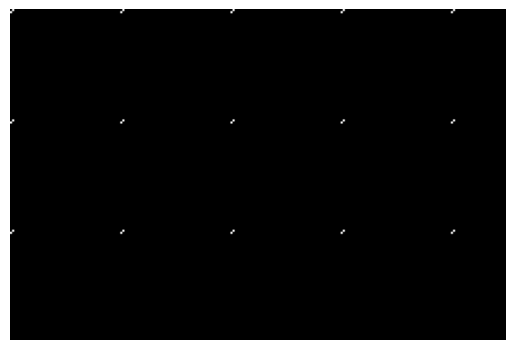

In [6]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
img = cv2.imread('image1.jpg')

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
# Encontrando os pontos de canto do padrão de calibração na imagem
ret, corners = cv2.findChessboardCorners(gray, (board_w, board_h), None)

In [10]:
img_corners = cv2.drawChessboardCorners(img, (board_w, board_h), corners, ret)

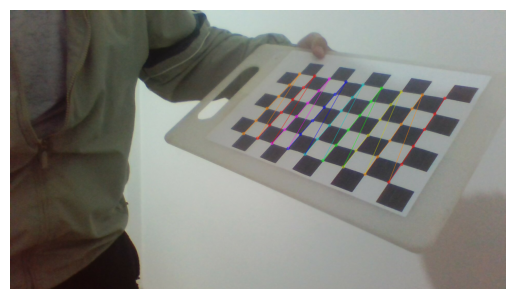

In [11]:
plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [16]:
### Seguindo o Tutorial do OPENCV

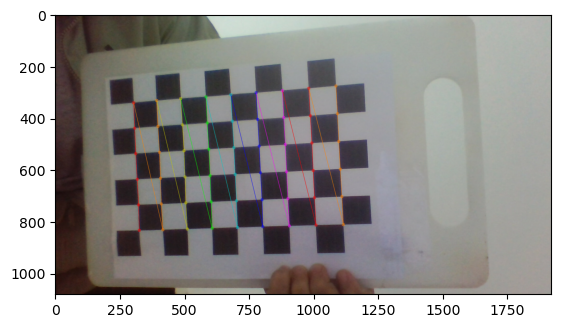

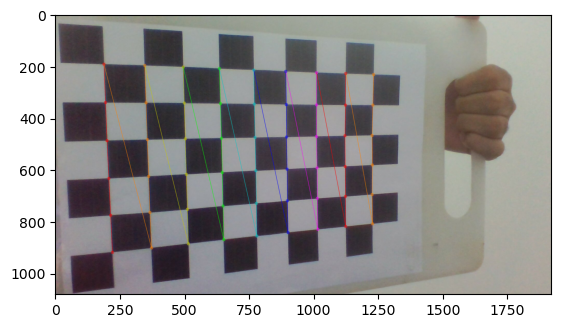

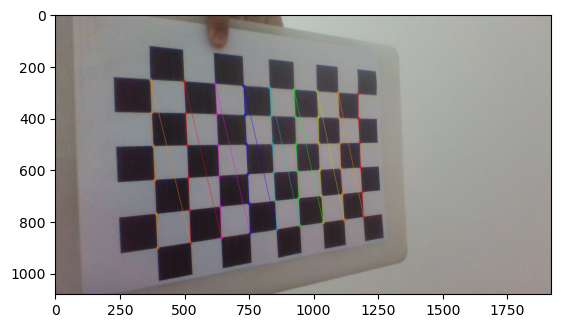

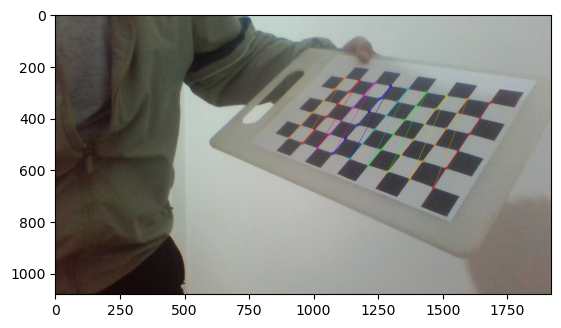

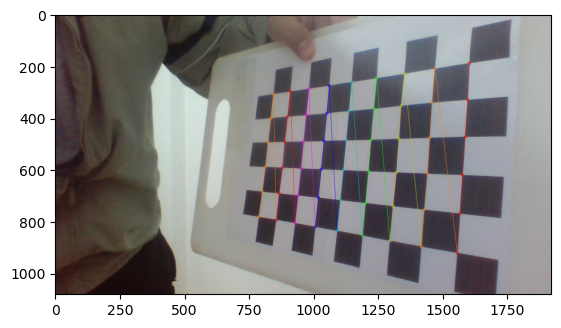

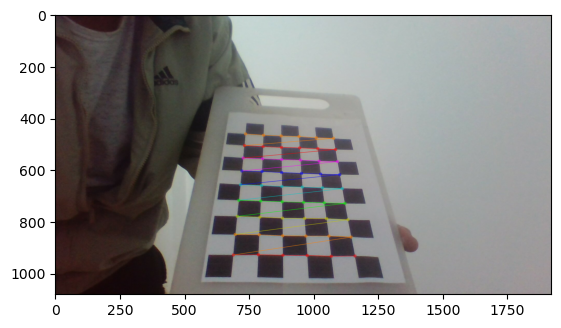

In [13]:
import glob
import cv2 as cv

board_w = 6
board_h = 9
square_size = 26

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, square_size, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((board_w*board_h,3), np.float32)
objp[:,:2] = np.mgrid[0:board_w,0:board_h].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.jpg')

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (board_w,board_h), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (board_w,board_h), corners2, ret)
        
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    

In [49]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [50]:
img = cv.imread('image2.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [51]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

True

In [52]:
# undistort
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

True

In [53]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.1512549213695277
